In [32]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [46]:
features, true_labels = make_blobs(
    n_samples=400,
    centers=2,
    cluster_std=2.75,
    random_state=42
)

In [47]:
features

array([[ 7.40718406e+00,  3.86717043e-01],
       [ 4.97069182e+00,  3.38787648e+00],
       [ 5.22017687e+00,  1.70720863e+00],
       [-1.09281649e+00,  1.96092977e+01],
       [ 4.20535712e+00,  7.99246742e-01],
       [ 4.69057215e+00,  2.92901937e+00],
       [ 2.22151456e-01,  2.53269468e+00],
       [-2.30073509e+00,  7.15209142e+00],
       [-4.78414528e-01,  9.48554890e+00],
       [-1.92043983e+00,  5.58850449e+00],
       [ 7.88294609e+00,  2.15884551e+00],
       [-2.47344242e+00,  1.30115048e+01],
       [ 6.27090730e+00,  1.12191698e+00],
       [-9.71349666e+00,  1.12745180e+01],
       [-2.60465499e+00,  5.80042152e+00],
       [-2.34356455e+00,  1.57882019e+01],
       [ 3.05375768e+00,  4.05049555e+00],
       [-1.89294330e+00,  9.04891523e+00],
       [-2.32349506e+00,  5.09622862e+00],
       [-3.81529723e+00,  7.21763074e+00],
       [-3.96603818e+00,  1.04257716e+01],
       [ 7.85127951e+00,  2.67282700e+00],
       [ 4.61795407e+00,  6.04301607e+00],
       [ 6.

In [48]:
true_labels

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [49]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [50]:
features[0] , scaled_features[0]

(array([7.40718406, 0.38671704]), array([ 1.44616772, -1.14192103]))

In [51]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    random_state=42
)

In [52]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, random_state=42)

In [53]:
kmeans.cluster_centers_

array([[-1.18996359,  0.56801662],
       [ 0.30386765, -0.20723291],
       [-0.5139461 ,  1.28059501],
       [ 1.03847503, -1.12332446]])

In [54]:
scaled_features[:5], true_labels[:5]

(array([[ 1.44616772, -1.14192103],
        [ 0.89710371, -0.47284916],
        [ 0.95332521, -0.84753354],
        [-0.4693091 ,  3.14351877],
        [ 0.72463538, -1.04995257]]),
 array([1, 1, 1, 0, 1]))

In [55]:
kmeans.labels_[:5]

array([3, 1, 3, 2, 3], dtype=int32)

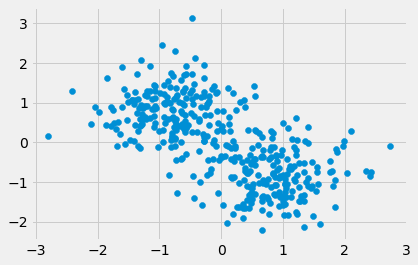

In [56]:
plt.scatter(scaled_features[:,0], scaled_features[:,1])

In [57]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

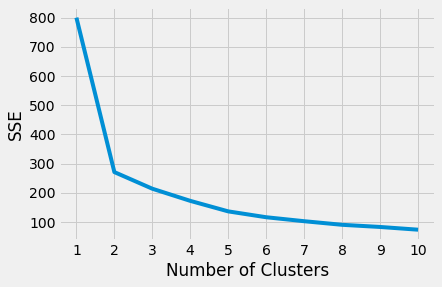

In [58]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()